In [ ]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Espanha.csv'

serie_esp = pd.read_csv(url)
serie_esp.drop(['Unnamed: 0','Confirmed','Recovered','Ano','Mês'],
               axis=1,inplace=True)
serie_esp['Date'] = pd.to_datetime(serie_esp['Date'],format='%Y-%m-%d')
serie_esp.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
serie_esp.set_index('Date',inplace=True)
serie_esp.head()

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [ ]:
# Selecionando apenas os primeiros meses do dataset
serie_esp = serie_esp[0:161]

In [ ]:
treino = serie_esp[0:131]
treino

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-27,27117
2020-05-28,27119
2020-05-29,27121


In [ ]:
teste = serie_esp[131:161]
teste.head()

,Deaths
Date,
2020-06-01,27127
2020-06-02,27127
2020-06-03,27128
2020-06-04,27133
2020-06-05,27134


In [ ]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1709.071, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1711.064, Time=0.20 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1711.942, Time=0.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1711.066, Time=0.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1712.269, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.86 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.93 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1692.904, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1693.735, Time=0.42 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1695.735, Time=1.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1693.697, Time=0.27 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1695.320, Time=0.80 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=4.59 sec
 ARIMA(0,1,1)(2,1,0)

In [ ]:
step2 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1643.678, Time=0.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1709.071, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1669.627, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1693.735, Time=0.38 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1657.324, Time=0.15 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1644.072, Time=1.31 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1644.466, Time=2.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1643.401, Time=0.58 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1644.382, Time=1.85 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1645.961, Time=3.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1693.697, Time=0.26 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1644.578, Time=0.81 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1644.742, Time=0.78 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1711.066, Time=0.14 sec
 ARIMA(0,1,2)(1,1,0

In [ ]:
step1.fit(treino['Deaths'])

ARIMA(order=(4, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
step2.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast=step1.predict(n_periods=len(teste))

In [ ]:
future_forecast1=step2.predict(n_periods=len(teste))

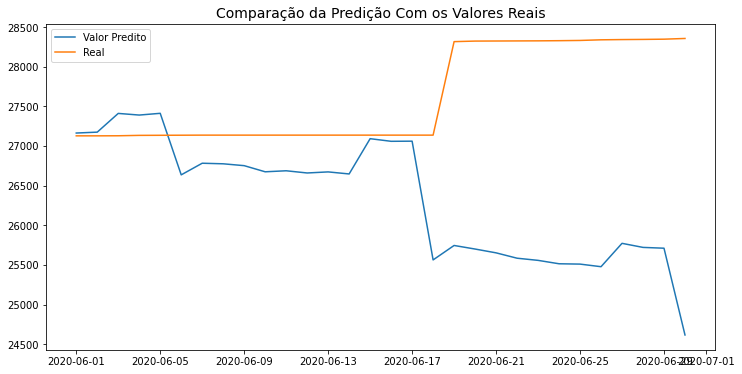

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1334.9127741050902
MAPE: 0.04745837283091852
RMSE: 1814.06464359529


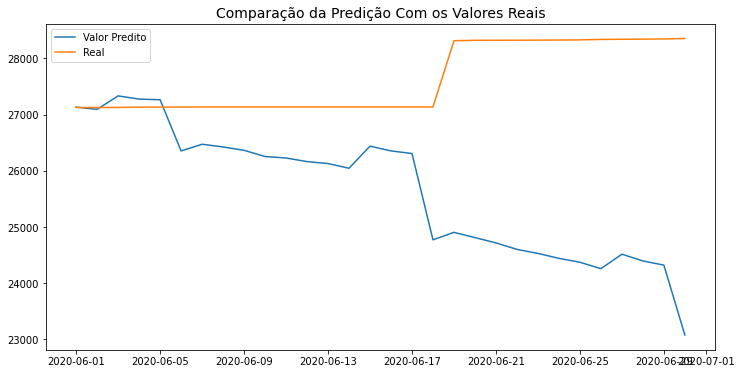

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [ ]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1999.8236665218044
MAPE: 0.0712551322109398
RMSE: 2588.974270648522
